In [3]:
# import
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import chart_studio.plotly as py
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
# Data from World Happiness Report
# https://worldhappiness.report/ed/2021/#appendices-and-data
# Data for Figure 2.1 in Appendices and Data

In [5]:
df = pd.read_excel("DataForFigure2.1WHR2021C2.xls", sheet_name = "Sheet1")
df1 = df.set_index("Country name")
df1.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [6]:
# Correlation matrix
df.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470314,0.999348,0.999395,0.789748,0.756967,0.768060,0.607733,-0.017769,-0.420974,NaN,0.789748,0.756967,0.768060,0.607733,-0.017769,0.420974,0.492065
Standard error of ladder score,-0.470314,1.000000,-0.438139,-0.500717,-0.645838,-0.530894,-0.583947,-0.274619,0.135204,0.277893,NaN,-0.645838,-0.530894,-0.583947,-0.274619,0.135204,-0.277893,0.138516
upperwhisker,0.999348,-0.438139,1.000000,0.997488,0.778004,0.749318,0.758446,0.607795,-0.012567,-0.417430,NaN,0.778004,0.749318,0.758446,0.607795,-0.012567,0.417430,0.506882
lowerwhisker,0.999395,-0.500717,0.997488,1.000000,0.800083,0.763401,0.776372,0.606924,-0.022756,-0.423868,NaN,0.800083,0.763401,0.776372,0.606924,-0.022756,0.423868,0.477191
Logged GDP per capita,0.789748,-0.645838,0.778004,0.800083,1.000000,0.785291,0.859486,0.432310,-0.199386,-0.342232,NaN,1.000000,0.785291,0.859486,0.432310,-0.199386,0.342232,-0.041112
Social support,0.756967,-0.530894,0.749318,0.763401,0.785291,1.000000,0.723248,0.483073,-0.114968,-0.203429,NaN,0.785291,1.000000,0.723248,0.483073,-0.114968,0.203429,0.006725
Healthy life expectancy,0.768060,-0.583947,0.758446,0.776372,0.859486,0.723248,1.000000,0.461368,-0.161815,-0.364292,NaN,0.859486,0.723248,1.000000,0.461368,-0.161815,0.364292,-0.023442
Freedom to make life choices,0.607733,-0.274619,0.607795,0.606924,0.432310,0.483073,0.461368,1.000000,0.169451,-0.401033,NaN,0.432310,0.483073,0.461368,1.000000,0.169451,0.401033,0.100413
Generosity,-0.017769,0.135204,-0.012567,-0.022756,-0.199386,-0.114968,-0.161815,0.169451,1.000000,-0.163900,NaN,-0.199386,-0.114968,-0.161815,0.169451,1.000000,0.163900,-0.027025
Perceptions of corruption,-0.420974,0.277893,-0.417430,-0.423868,-0.342232,-0.203429,-0.364292,-0.401033,-0.163900,1.000000,NaN,-0.342232,-0.203429,-0.364292,-0.401033,-0.163900,-1.000000,0.004470


In [7]:
# Comparing Finland, Denmark, Switzerland, Iceland, and Netherlands by:
# Freedom to make life choices, generosity, perceptions of corruption
df1.iloc[:5,8:11].iplot()

In [8]:
# Comparing GDP and Life Expectency
df.iplot(kind = "scatter", y = "Logged GDP per capita", x = "Healthy life expectancy", mode = "markers", color = "blue", categories = "Country name", yTitle = "GDP per capita", xTitle = "Life Expectancy")

/Users/tom/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/tom/opt/anaconda3/lib/python3.9/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [9]:
# Correlation between life expectancy and Logged GDP per capita
st.pearsonr(df["Healthy life expectancy"],df["Logged GDP per capita"])

(0.8594858160149568, 1.0966984205925271e-44)

In [10]:
# Comparing GDP and Social Support
df.iplot(kind = "scatter", y = "Logged GDP per capita", x = "Social support", mode = "markers", color = "blue", categories = "Country name", yTitle = "GDP per capita", xTitle = "Social Support Score")

In [11]:
# Correlation between life expectancy and Logged GDP per capita
st.pearsonr(df["Healthy life expectancy"],df["Logged GDP per capita"])

(0.8594858160149568, 1.0966984205925271e-44)

In [12]:
# Comparing GDP and Social Support
df.iplot(kind = "scatter", y = "Healthy life expectancy", x = "Social support", mode = "markers", color = "blue", categories = "Country name", yTitle = "Life Expectancy", xTitle = "Social Support Score")

In [13]:
# Correlation between life expectancy and Logged GDP per capita
st.pearsonr(df["Social support"],df["Healthy life expectancy"])

(0.7232477046080052, 2.093626926076815e-25)

In [14]:
# Regions and Average GDP
avg_gdp = df.groupby("Regional indicator")["Logged GDP per capita"].mean()
avg_gdp.iplot(kind="bar", color = "orange")

In [15]:
# Bubble plot for corruption, freedom of choice, and GDP per capita in Western Europe
weu = df[df["Regional indicator"]=="Western Europe"]
weu.iplot(kind = "bubble", x = "Perceptions of corruption", y = "Freedom to make life choices", size = "Logged GDP per capita", categories = "Country name", xTitle = "Perception of corruption", yTitle = "Freedom to make life choices", title = "Corruption, Freedom of choices and GDP per capita (size) in Western Europe")

In [16]:
# Bubble plot for corruption, freedom of choice, and GDP per capita in All of Europe
eu = df[df["Regional indicator"].str.contains("europe", case = False, na = False)]
eu.iplot(kind = "bubble", x = "Perceptions of corruption", y = "Freedom to make life choices", size = "Logged GDP per capita", categories = "Country name", xTitle = "Perception of corruption", yTitle = "Freedom to make life choices", title = "Corruption, Freedom of choices, and GDP per capita (size) in Europe")

In [17]:
# Bubble plot for corruption, freedom of choice, and GDP per capita in All of Europe
eu.iplot(kind = "bubble", x = "Healthy life expectancy", y = "Freedom to make life choices", size = "Logged GDP per capita", categories = "Country name", xTitle = "Life Expectancy", yTitle = "Freedom to make life choices", title = "Life Expectancy, Freedom of choices, and GDP per capita (size) in Europe")

In [18]:
## Machine Learning ## Two Models Below

In [19]:
semiclean = df1.drop(['Regional indicator',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis = 1)
semiclean

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
Country name,,,,,,,,,,,
Finland,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343
Denmark,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343
Switzerland,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343
Iceland,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343
Netherlands,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343
...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,3.5118,0.120454,3.747890,3.275710,7.925777,0.786871,48.700001,0.714954,-0.130536,0.915377,2.430343
Botswana,3.4665,0.073872,3.611289,3.321711,9.781536,0.784171,59.269188,0.824394,-0.246159,0.800619,2.430343
Rwanda,3.4147,0.067830,3.547647,3.281753,7.676118,0.552339,61.399727,0.896758,0.060526,0.166801,2.430343


<AxesSubplot:ylabel='Country name'>

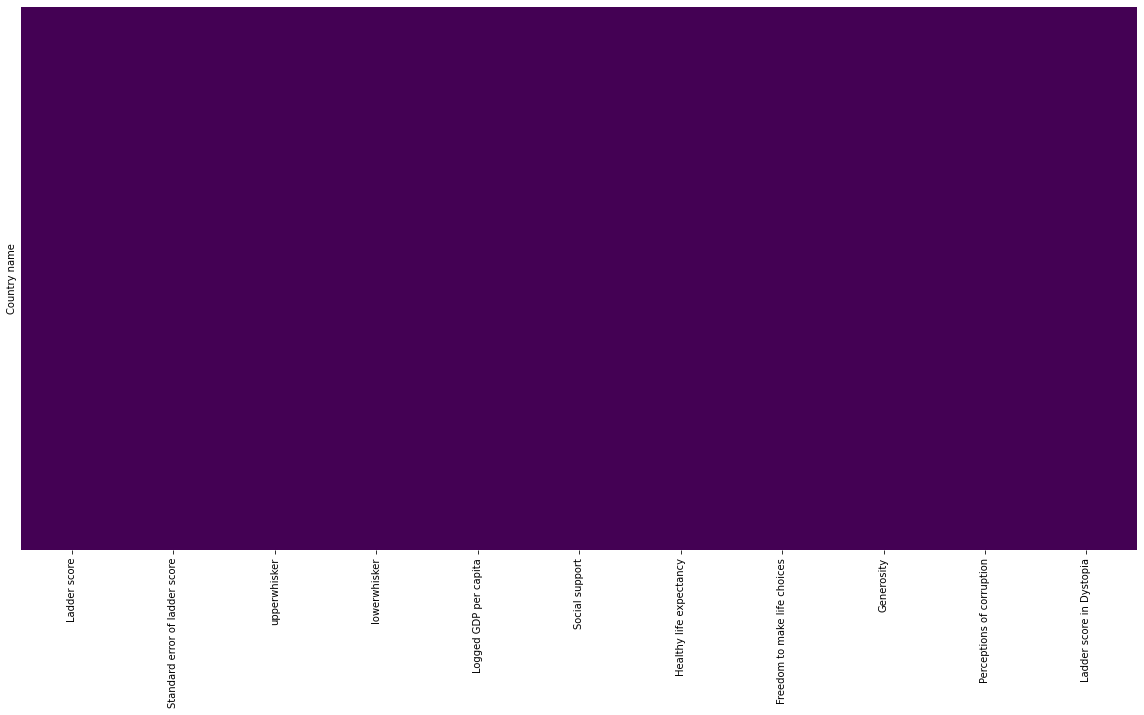

In [20]:
sns.heatmap(semiclean.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

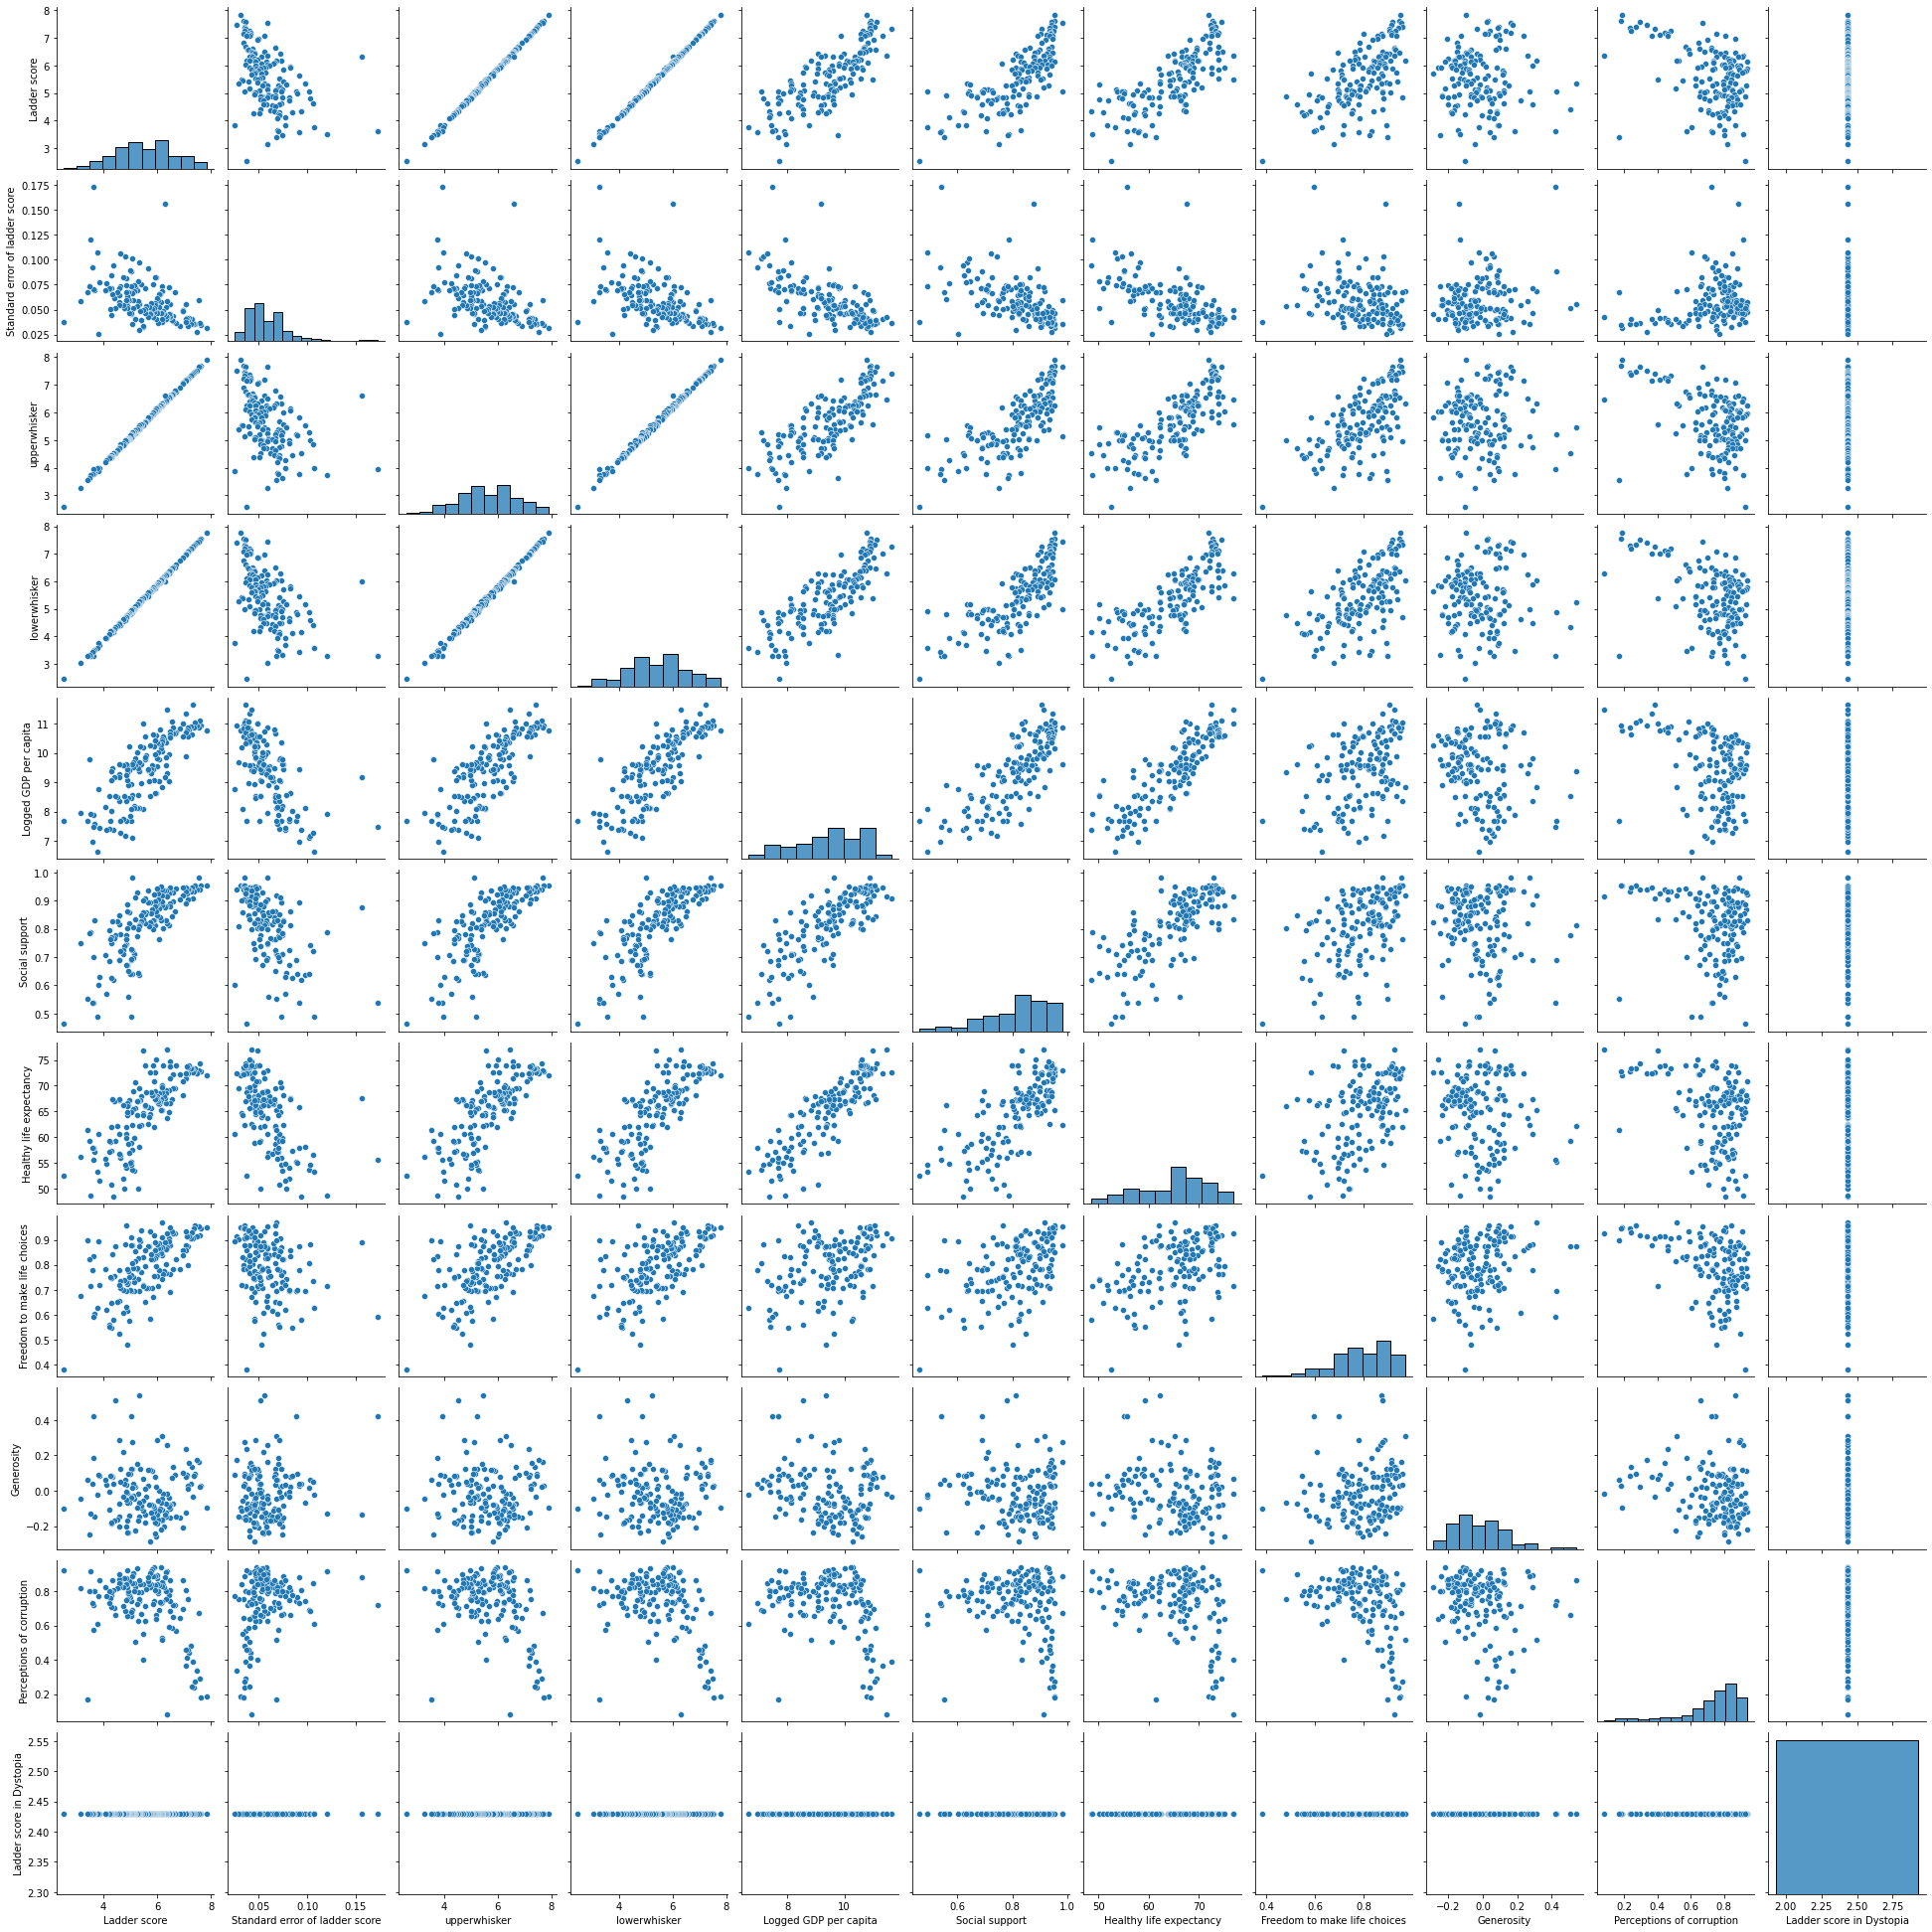

In [21]:
sns.pairplot(semiclean)

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Count'>

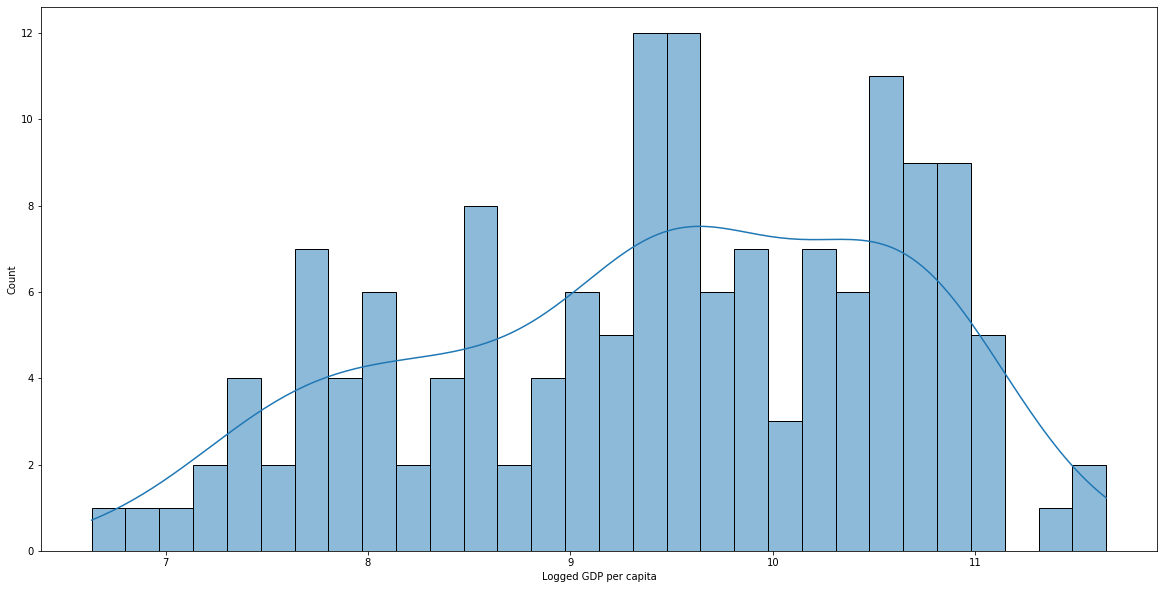

In [22]:
sns.histplot(semiclean["Logged GDP per capita"], kde = True, bins = 30)

<AxesSubplot:>

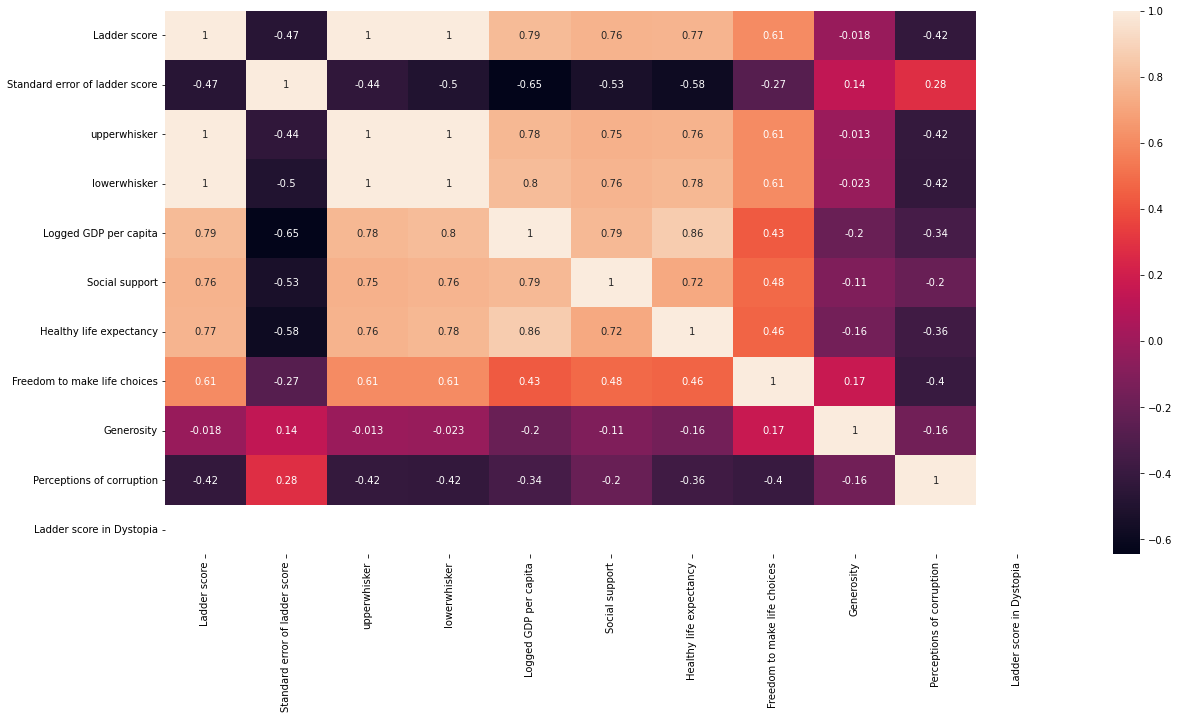

In [23]:
sns.heatmap(semiclean.corr(), annot = True)

In [24]:
## Machine Learning Linear Regression Model 1: MLLRM1

In [25]:
X = semiclean.drop(["Logged GDP per capita"],axis = 1)
y = semiclean["Logged GDP per capita"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
pd.DataFrame(lm.coef_,X_train.columns,columns = ["Coef"])

,Coef
Ladder score,-6.194326e+05
Standard error of ladder score,1.690481e+06
upperwhisker,-1.215314e+05
lowerwhisker,7.409642e+05
Social support,2.192073e+00
Healthy life expectancy,7.478320e-02
Freedom to make life choices,6.854002e-02
Generosity,-9.894618e-01
Perceptions of corruption,9.149442e-03
Ladder score in Dystopia,0.000000e+00


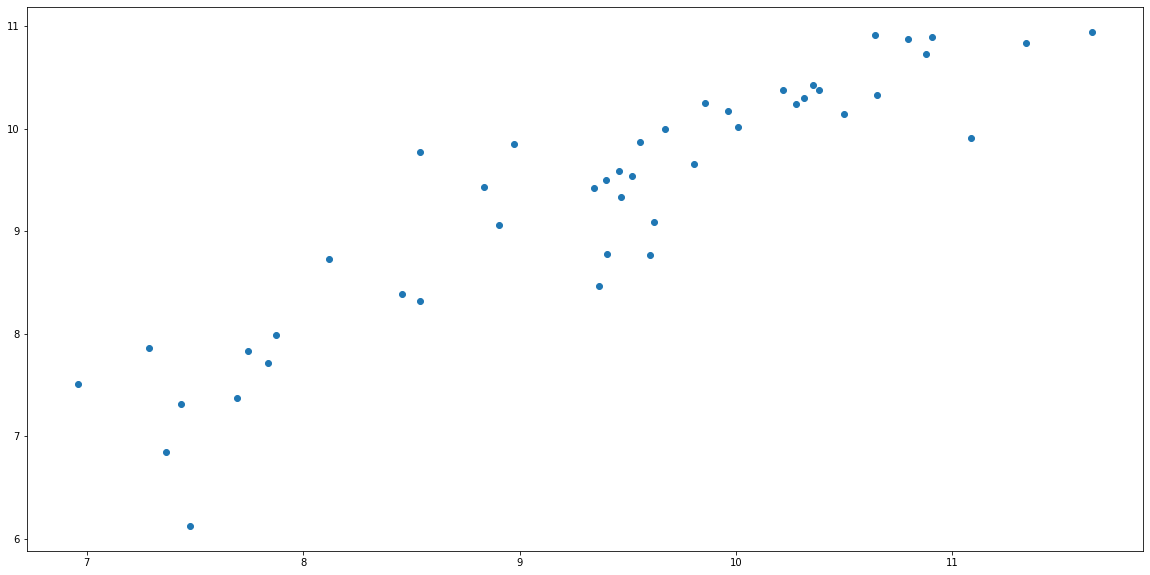

In [28]:
p1 = lm.predict(X_test)
plt.scatter(y_test,p1)

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Count'>

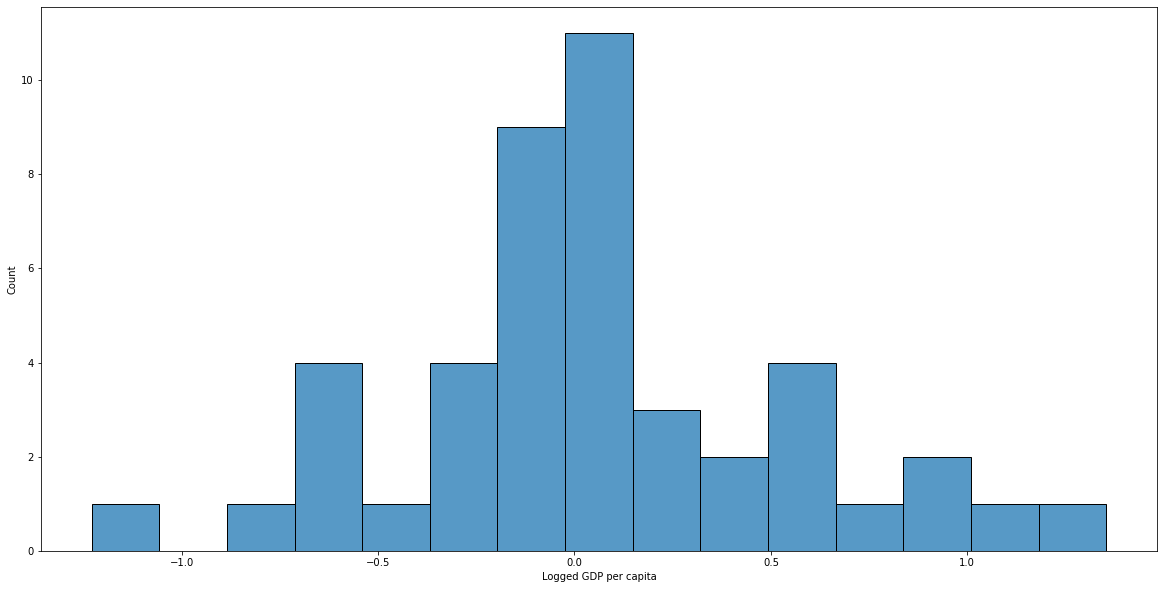

In [29]:
sns.histplot((y_test-p1), bins = 15)

In [30]:
from sklearn import metrics
# MAE
metrics.mean_absolute_error(y_test,p1)

0.358031220507065

In [31]:
# MSE
metrics.mean_squared_error(y_test,p1)

0.24703540936749213

In [32]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,p1))

0.4970265680700501

In [33]:
# RMSE / Mean Value
np.sqrt(metrics.mean_squared_error(y_test,p1))/y_test.mean()

0.05298982507637355

In [34]:
# R2 Score
from sklearn.metrics import r2_score

r2_score(y_test, p1)

0.8292420233977936

In [35]:
## Machine Learning Linear Regression Model 2: MLLRM2

In [36]:
X = semiclean.drop(["Logged GDP per capita", "Standard error of ladder score","upperwhisker","lowerwhisker"],axis = 1)
y = semiclean["Logged GDP per capita"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pd.DataFrame(lm.coef_,X_train.columns,columns = ["Coef"])

,Coef
Ladder score,0.280927
Social support,2.523018
Healthy life expectancy,0.075200
Freedom to make life choices,-0.569005
Generosity,-1.168660
Perceptions of corruption,-0.585682
Ladder score in Dystopia,0.000000


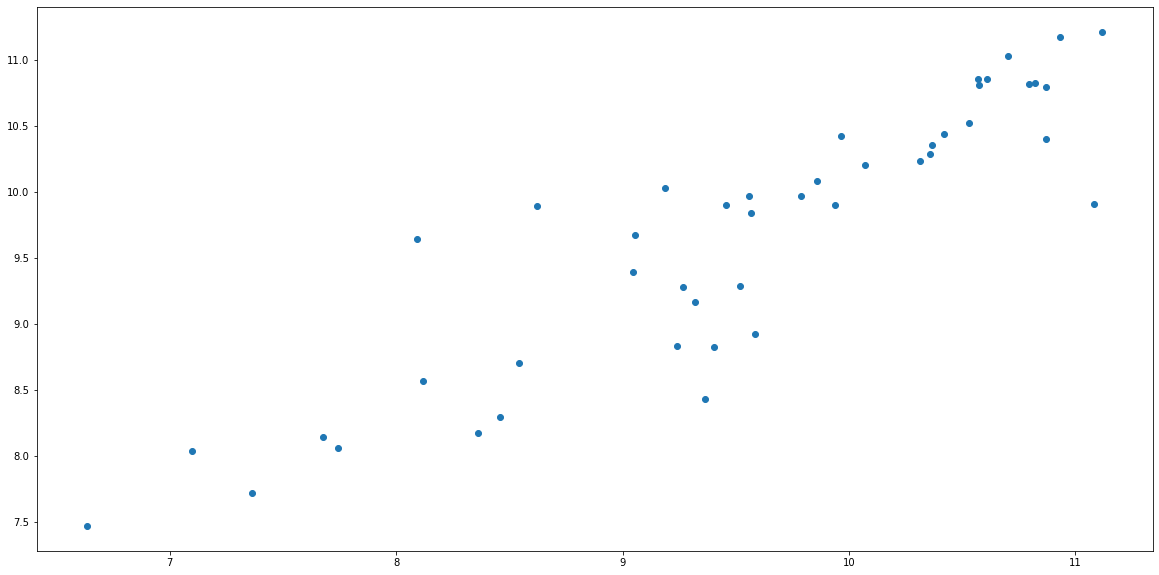

In [38]:
p1 = lm.predict(X_test)
plt.scatter(y_test,p1)

In [39]:
# MAE
metrics.mean_absolute_error(y_test,p1)

0.3786517801482358

In [40]:
# MSE
metrics.mean_squared_error(y_test,p1)

0.27122477017810664

In [41]:
# RMSE
np.sqrt(metrics.mean_squared_error(y_test,p1))

0.520792444432623

In [42]:
# RMSE / Mean Value
np.sqrt(metrics.mean_squared_error(y_test,p1))/y_test.mean()

0.054648239781790765

In [43]:
# R2 Score
r2_score(y_test, p1)

0.7894237352794864